In [1]:
def read_file(input_file):
    with open(input_file, 'r') as f:
        rawdata = np.genfromtxt(f, dtype=int, delimiter=',')
    return rawdata

In [8]:
def KK(input_seq):
    heap = []
    for num in input_seq:
        heapq.heappush(heap, -num)
    while len(heap) >= 2:
        a = heapq.heappop(heap)
        b = heapq.heappop(heap)
        heapq.heappush(heap, a-b)
        
    resd = -heapq.heappop(heap)
    return resd

In [63]:
def random_solutionGen(n):
    return [random.randint(0, 1) * 2 - 1 for _ in range(n)]

def residue(input_seq, solution):
    return abs(np.dot(input_seq, solution))

def random_neighbors(solution):
    s = copy.deepcopy(solution)
    n = len(solution)
    i, j = random.sample(range(n), 2)
    s[j] = -s[j]
    if random.random() < 0.5:
        s[i] = -s[i]
    return s

def tmpr(num):
    return 10**10*0.8**np.floor(num/300)

def prepartGen(input_seq):
    n = len(input_seq)
    p = [random.randint(0, n-1) for _ in range(n)]
    return p

def p_trans_res(input_seq, p):
    n = len(input_seq)
    a_ = [0 for _ in range(n)]
    for i in range(n):
        for j in range(n):
            if p[j] == i:
                a_[i] += input_seq[j]
    return KK(a_)

def random_neighbors_p(partition):
    p = copy.deepcopy(partition)
    n = len(partition)
    for t in range(n):
        i, j = random.sample(range(n), 2)
        if p[i] != j:
            p[i] = j
            break
    return p

In [67]:
def repeated_random(input_seq, num_iter):
    n = len(input_seq)
    s = random_solutionGen(n)
    for i in range(num_iter):
        s_ = random_solutionGen(n)
        if residue(input_seq, s_) < residue(input_seq, s):
            s = s_
    return residue(input_seq, s)

def hill_climb(input_seq, num_iter):
    n = len(input_seq)
    s = random_solutionGen(n)
    for i in range(num_iter):
        s_ = random_neighbors(s)
        if residue(input_seq, s_) < residue(input_seq, s):
            s = s_
    return residue(input_seq, s)

def simulated_anneal(input_seq, num_iter):
    n = len(input_seq)
    s = random_solutionGen(n)
    s__ = copy.deepcopy(s)
    for i in range(num_iter):
        s_ = random_neighbors(s)
        if residue(input_seq, s_) < residue(input_seq, s):
            s = s_
        else:
            if random.random() < np.exp(-(residue(input_seq, s_)-residue(input_seq, s))/tmpr(i)):
                s = s_
        if residue(input_seq, s) < residue(input_seq, s__):
            s__ = s
    return residue(input_seq, s__)

def prepart_rand(input_seq, num_iter):
    partition = prepartGen(input_seq)
    for i in range(num_iter):
        partition_ = prepartGen(input_seq)
        if p_trans_res(input_seq, partition_) < p_trans_res(input_seq, partition):
            partition = partition_
    return p_trans_res(input_seq, partition)

def prepart_hill(input_seq, num_iter):
    p = prepartGen(input_seq)
    for i in range(num_iter):
        p_ = random_neighbors_p(p)
        if p_trans_res(input_seq, p_) < p_trans_res(input_seq, p):
            p = p_
    return p_trans_res(input_seq, p)

def prepart_simul(input_seq, num_iter):
    p = prepartGen(input_seq)
    p__ = copy.deepcopy(p)
    for i in range(num_iter):
        p_ = random_neighbors_p(p)
        if p_trans_res(input_seq, p_) < p_trans_res(input_seq, p):
            p = p_
        else:
            if random.random() < np.exp(-(p_trans_res(input_seq, p_)-p_trans_res(input_seq, p))/tmpr(i)):
                p = p_
        if p_trans_res(input_seq, p) < p_trans_res(input_seq, p__):
            p__ = p
    return p_trans_res(input_seq, p__)

In [71]:
def main_fc(flag, algr, input_file, num_iter):
    indata = read_file(input_file)
    
    if flag !=0:
        import time
        start = time.time()
        
    if algr == 0:
        res = KK(indata)
    if algr == 1:
        res = repeated_random(indata, num_iter)
    if algr == 2:
        res = hill_climb(indata, num_iter)
    if algr == 3:
        res = simulated_anneal(indata, num_iter)
    if algr == 11:
        res = prepart_rand(indata, num_iter)
    if algr == 12:
        res = prepart_hill(indata, num_iter)
    if algr == 13:
        res = prepart_simul(indata, num_iter)
        
    if flag !=0:
        end = time.time()
        print('The running time per trial is: {0} ms'.format((end-start) * 1000/numtrials))
    return res

In [115]:
def main_fc_d(flag, algr, indata, num_iter):
    
    if flag !=0:
        import time
        start = time.time()
        
    if algr == 0:
        res = KK(indata)
    if algr == 1:
        res = repeated_random(indata, num_iter)
    if algr == 2:
        res = hill_climb(indata, num_iter)
    if algr == 3:
        res = simulated_anneal(indata, num_iter)
    if algr == 11:
        res = prepart_rand(indata, num_iter)
    if algr == 12:
        res = prepart_hill(indata, num_iter)
    if algr == 13:
        res = prepart_simul(indata, num_iter)
        
    if flag !=0:
        end = time.time()
#         return (end-start) * 1000/num_iter
        print('The running time per trial is: {0} ms'.format((end-start) * 1000/num_iter))
    return res

In [79]:
import sys
import heapq
import numpy as np
import random
import copy

result = []
for i in range(50):
    data = random.sample(range(10**11), 100)
    res = []
    for j in [0,1,2,3,11,12,13]:
        res.append(main_fc_d(0, j, data, 25000))
    result.append(res)
    
result

with open('results.txt', 'w') as f:
    for trial in result:
        f.write(f"{trial}\n")

In [80]:
result

[[21523, 43744851, 23375023, 30940463, 9, 71, 13],
 [826, 12943800, 39942296, 2410348, 14, 50, 14],
 [1178, 4508212, 9273796, 4045216, 16, 6, 22],
 [9689, 7322021, 17384759, 153751, 7, 105, 3],
 [18636, 6528498, 4457766, 4695236, 10, 76, 38],
 [192962, 1748964, 6914820, 16113800, 16, 74, 10],
 [18300, 31586738, 76750344, 22865384, 18, 22, 30],
 [2172, 5652608, 10558748, 2491586, 74, 90, 48],
 [9138, 12454488, 43015970, 145748578, 4, 90, 16],
 [115099, 20123295, 31684235, 37337499, 3, 309, 9],
 [7272, 30455044, 17549554, 47850418, 4, 134, 36],
 [16942, 4777162, 9883756, 25813992, 30, 14, 0],
 [2370, 47074820, 41129532, 24955238, 24, 2, 0],
 [58777, 19569225, 77795251, 48369707, 31, 157, 33],
 [102873, 4205519, 65338577, 13306087, 21, 29, 19],
 [63550, 133710074, 11912500, 529458, 6, 46, 18],
 [9291, 34632433, 3594871, 8075137, 15, 51, 1],
 [6161, 6202079, 39603123, 17326389, 1, 21, 21],
 [58269, 31712261, 11406717, 4284085, 3, 275, 29],
 [25996, 1058172, 96069656, 25847142, 32, 404, 26]

In [83]:
import pandas as pd
df = pd.DataFrame(result)
df.columns = ['Karmarkar-Karp','Repeated Random','Hill Climbing','Simulated Annealing'
              ,'Prepartitioned Repeated Random','Prepartitioned Hill Climbing','Prepartitioned Simulated Annealing']

In [84]:
df

,Karmarkar-Karp,Repeated Random,Hill Climbing,Simulated Annealing,Prepartitioned Repeated Random,Prepartitioned Hill Climbing,Prepartitioned Simulated Annealing
0,21523,43744851,23375023,30940463,9,71,13
1,826,12943800,39942296,2410348,14,50,14
2,1178,4508212,9273796,4045216,16,6,22
3,9689,7322021,17384759,153751,7,105,3
4,18636,6528498,4457766,4695236,10,76,38
5,192962,1748964,6914820,16113800,16,74,10
6,18300,31586738,76750344,22865384,18,22,30
7,2172,5652608,10558748,2491586,74,90,48
8,9138,12454488,43015970,145748578,4,90,16
9,115099,20123295,31684235,37337499,3,309,9


In [88]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Karmarkar-Karp,Repeated Random,Hill Climbing,Simulated Annealing,Prepartitioned Repeated Random,Prepartitioned Hill Climbing,Prepartitioned Simulated Annealing
count,50.00,50.00,50.00,50.00,50.00,50.00,50.00
mean,38290.88,26064282.12,24177512.52,23002679.40,13.48,72.36,21.72
std,67406.35,29569086.87,24679160.60,25660444.57,13.52,78.07,22.55
min,597.00,366338.00,239635.00,132249.00,1.00,0.00,0.00
25%,7137.75,7858515.00,8141698.75,4503092.75,4.25,21.00,7.25
50%,17510.50,18943262.50,16336559.00,17095418.50,8.50,50.50,17.00
75%,37072.00,31303814.50,31090235.00,27027065.00,18.75,90.00,30.75
max,415737.00,133710074.00,112701661.00,145748578.00,74.00,404.00,131.00


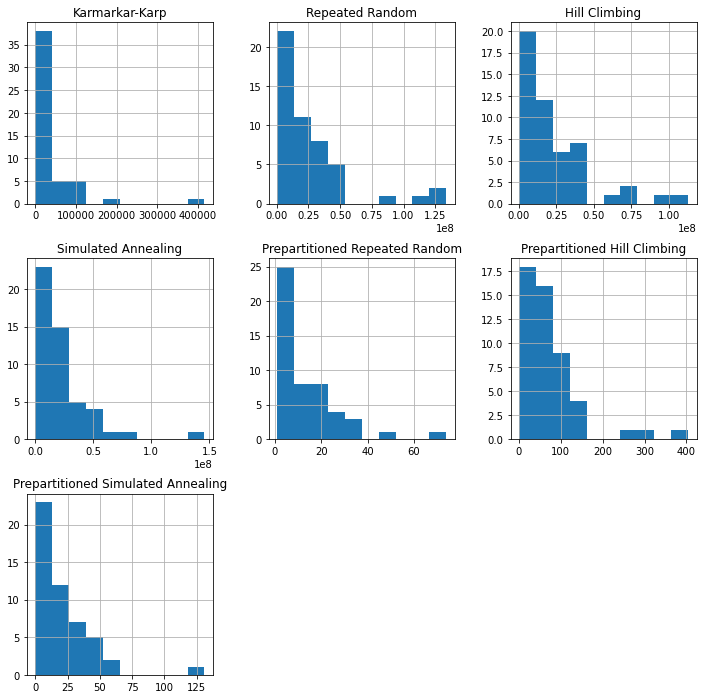

In [90]:
import matplotlib.pyplot as plt

# Draw histograms for each column
df.hist(figsize=(12,12))

# Show the plot
plt.show()

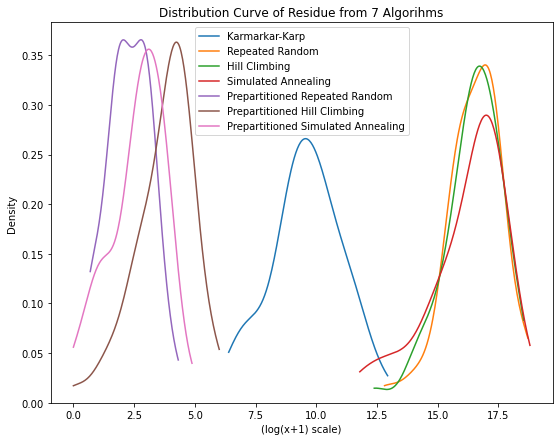

In [106]:
import seaborn as sns
plt.figure(figsize=(9,7))

for col in df.columns:
    sns.kdeplot(np.log1p(df[col]), label=col, log_scale=False, cut=0)

# Set plot title and axis labels
plt.title('Distribution Curve of Residue from 7 Algorihms')
plt.xlabel('(log(x+1) scale)')
plt.ylabel('Density')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [116]:
data = random.sample(range(10**11), 100)
main_fc_d(1, 0, data, 25000)

The running time per trial is: 6.561279296875e-06 ms


10147

In [117]:
main_fc_d(1, 1, data, 25000)

The running time per trial is: 0.07369256019592285 ms


35908743

In [118]:
main_fc_d(1, 2, data, 25000)

The running time per trial is: 0.054038438796997074 ms


28568203

In [119]:
main_fc_d(1, 3, data, 25000)

The running time per trial is: 0.09566797256469727 ms


1337895

In [120]:
main_fc_d(1, 11, data, 25000)

The running time per trial is: 0.6823272323608398 ms


23

In [121]:
main_fc_d(1, 12, data, 25000)

The running time per trial is: 0.6544557666778564 ms


17

In [122]:
main_fc_d(1, 13, data, 25000)

The running time per trial is: 1.753415174484253 ms


41